1. Perceptron code

In [2]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as myplt

X,y= make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                         n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

X


array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [7]:
np.shape(X)

(100, 2)

In [4]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [8]:
np.shape(y)

(100,)

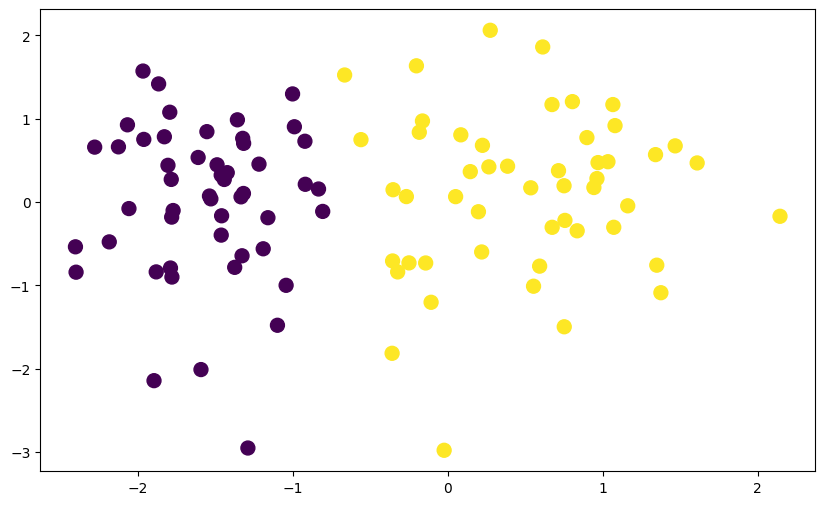

In [9]:
myplt.figure(figsize=(10,6))
myplt.scatter(X[:,0], X[:,1], c=y, s=100)
myplt.show()

In [10]:
def perceptron(X,y):
    X=np.insert(X,0,1, axis=1) #putting 1 for column of Bias value of x i.e. X0
    weights= np.ones(X.shape[1])
    lr = 0.1

    for epoch in range(1000):
        j= np.random.randint(0,100)
        y_hat= step(np.dot(X[j],weights))
        weights=weights + lr*(y[j]- y_hat)*X[j]
        
    return weights[0], weights[1:]

In [14]:
def step(z):
    if z>0:
        return 1
    else:
        return 0
    


In [15]:
intercept, coeff = perceptron(X,y)

In [16]:
print(intercept)

1.0


In [17]:
print(coeff)

[1.41385476 0.18915323]


In [18]:
m = -(coeff[0]/coeff[1])
b=-(intercept/coeff[1])

In [36]:
x_input= np.linspace(-1,0,100)
y_input= m*x_input + b

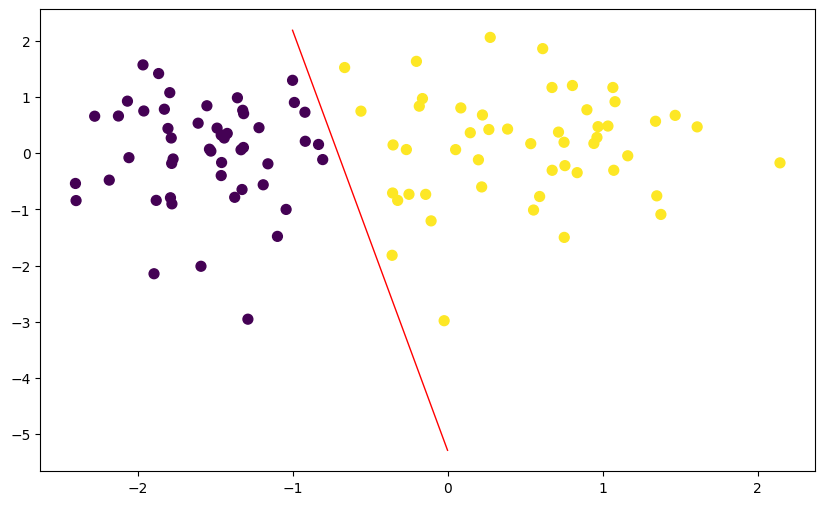

In [38]:
myplt.figure(figsize=(10,6))
myplt.plot(x_input,y_input, color = 'red', linewidth=1)
myplt.scatter(X[:,0], X[:,1], c=y, s=50)
myplt.show()

2. LOSS FUNCTION


In [78]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

X_new,y_new = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                         n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

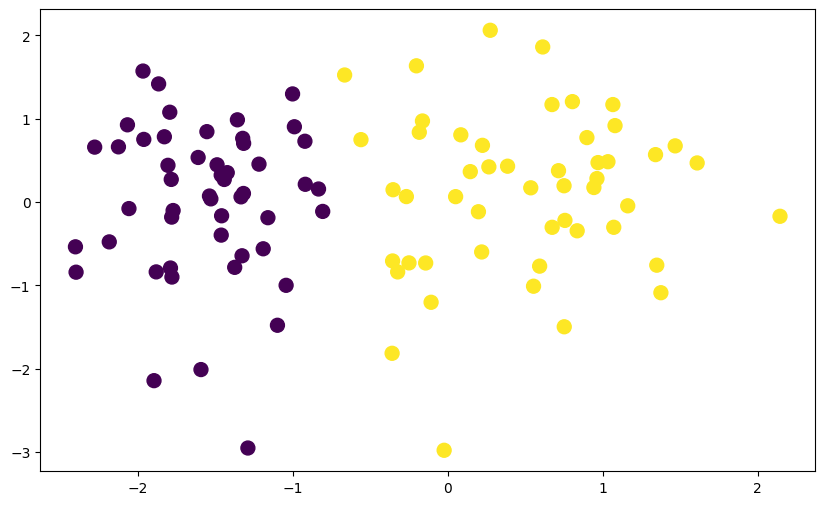

In [115]:
plt.figure(figsize=(10,6))
plt.scatter(X_new[:,0], X_new[:,1], c=y_new, s=100)


loss

In [231]:
def loss_perceptron(X,y):
    w1=w2=b=1
    lr=0.01
    for epoch in range(1000):
        for i in range(X_new.shape[0]):
            z=w1*X[i][0] + w2*X[i][1] + b
            if z*y[i]<0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]
            

    return w1,w2,b

In [232]:
w1,w2,b = loss_perceptron(X_new,y_new)

In [233]:
print(w1,w2,b)

0.9528503998369486 0.40102904732287015 1.2700000000000002


In [234]:
m_new = -(w1/w2)
c_new = -(b/w2)

print(m_new,c_new)

-2.3760134239597983 -3.1668528962629434


In [235]:
x_i=np.linspace(-3,3,100)
y_i= m_new*x_i + c_new

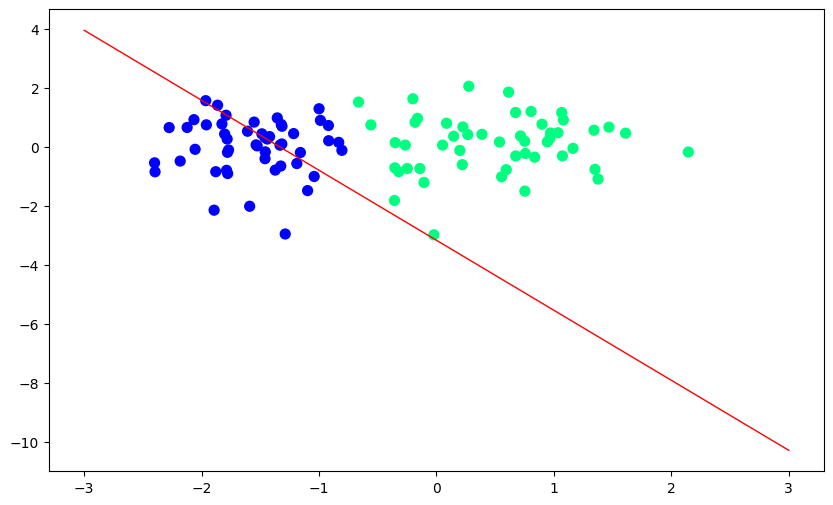

In [236]:
plt.figure(figsize=(10,6))
plt.plot(x_i, y_i, color='red', linewidth=1)
plt.scatter(X_new[:,0], X_new[:,1], c=y_new, cmap='winter', s=50)